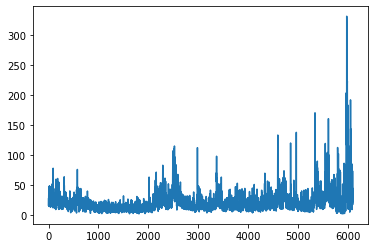

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

SP = pd.read_csv('SnP500.csv').dropna()
RU = pd.read_csv('RUT.csv').dropna()
TR = pd.read_csv('TREAST.csv')

plt.plot(SP.High - SP.Low)



In [3]:
len(SP[SP.Date < '2001-12-31'])

321

In [89]:
SP = SP[SP.Date > '2000-12-31']
p = (SP.High - SP.Low)**(1/2)
med = (SP.High + SP.Low)/2

In [90]:
R = R[R.Date > '2000-12-31']
R

,Date,Open,High,Low,Close,Adj Close,Volume
3364,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,11294000
3365,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,1880700
3366,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,2169400
3367,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,14308000
3368,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,11155000
...,...,...,...,...,...,...,...
8292,2020-08-05,1521.790039,1546.400024,1521.790039,1546.239990,1546.239990,47322200
8293,2020-08-06,1546.439941,1550.469971,1537.459961,1544.619995,1544.619995,42674900
8294,2020-08-07,1542.520020,1569.260010,1539.520020,1569.180054,1569.180054,41048600
8295,2020-08-10,1573.750000,1593.829956,1573.750000,1584.670044,1584.670044,43185700


In [91]:
SP

,Date,Open,High,Low,Close,Adj Close,Volume
91,2001-01-02,1331.00,1336.75,1289.25,1300.00,1300.00,92668.0
92,2001-01-03,1301.00,1367.25,1288.75,1359.00,1359.00,130684.0
93,2001-01-04,1360.00,1365.50,1341.50,1349.00,1349.00,110846.0
94,2001-01-05,1345.75,1380.00,1303.00,1304.00,1304.00,117776.0
96,2001-01-08,1308.25,1312.50,1287.50,1309.50,1309.50,120010.0
...,...,...,...,...,...,...,...
6100,2020-08-03,3272.00,3295.50,3254.75,3288.50,3288.50,1250449.0
6101,2020-08-04,3290.75,3300.50,3271.00,3300.00,3300.00,1145269.0
6102,2020-08-05,3300.75,3323.25,3292.00,3316.00,3316.00,1116787.0
6103,2020-08-06,3317.00,3345.50,3300.50,3344.25,3344.25,1346665.0


In [6]:
p.reset_index(drop=True).head(20)

0     6.892024
1     8.860023
2     4.898979
3     8.774964
4     5.000000
5     4.663690
6     5.612486
7     4.898979
8     4.769696
9     4.000000
10    4.821825
11    5.196152
12    5.099020
13    4.769696
14    4.924429
15    3.708099
16    4.000000
17    4.062019
18    3.937004
19    4.582576
dtype: float64

NameError: name 'kop3uHa' is not defined

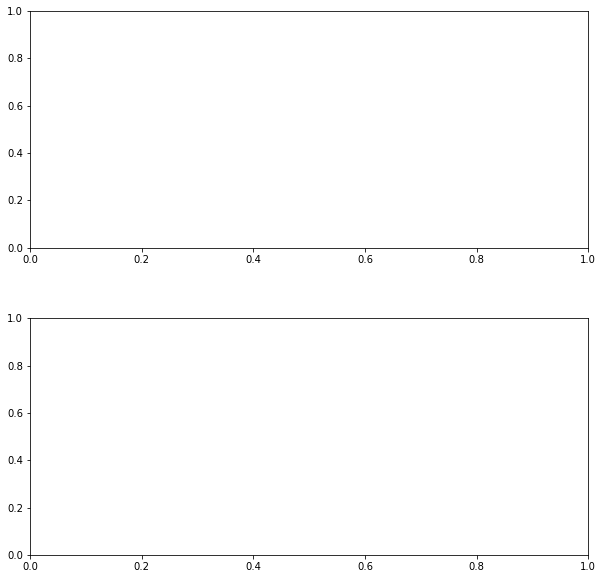

In [7]:
x0 = np.linspace(0, 100, 100)

for i in range(0, len(p), 5):
    arr = []
    arr.append(p[i:i+100])
    
#     plt.hist(arr, bins=15)
#     plt.savefig(f'hist/{SP.Date[SP.index[i]]}.png')
#     plt.clf()
#     #med[i:i+300].plot(secondary_y=True)
#     plt.plot(med[i:i+300])
    fig, ax = plt.subplots(nrows=2, ncols=1)
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    ax1, ax2 = ax.flatten()
    ax1.hist(kop3uHa, bins=15)
    #ax2.plot(np.array(med[i:i+300])., color='g')
    z = np.polyfit(x0, med[i:i+100], 1)
    y_hat = np.poly1d(z)(x)

    ax2.plot(x, y_hat, "r--", linewidth=4, lw=1)
    plt.title(f'{SP.Date[SP.index[i]]}')
    #plt.savefig(f'hist/{SP.Date[SP.index[i]]}.png')
    plt.clf()

    


In [8]:
SP.Date[SP.index[1]]

'2001-01-03'

In [ ]:

med = med.reset_index(drop=True)
med


In [96]:
from datetime import datetime 

datetime.strptime(SP.Date[SP.index[1]], '%Y-%m-%d')

SPV = pd.DataFrame(SP[['Date', 'Volume']])
SPV = SPV.set_index('Date')

TRV = TR.set_index('DATE')


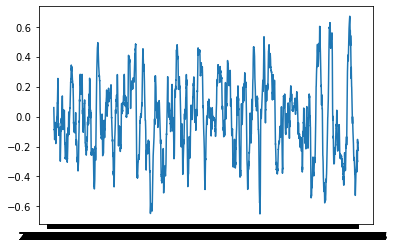

In [129]:
SPVTRV = SPV[SPV.index > '2002-12-17'].join(TRV)
SPVTRV.TREAST = SPVTRV.TREAST.fillna(method='ffill')
corr = SPVTRV.Volume.rolling(window=100).corr(SPVTRV.TREAST)
plt.plot(corr)
plt.show()

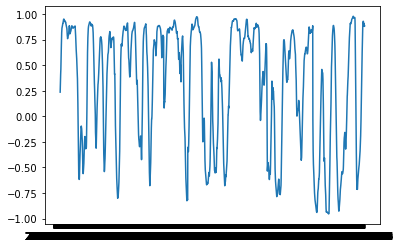

In [134]:
SP['med'] = (SP.Open + SP.Close)/2
SPM = SP[['Date', 'med']]
SPM = SPM.set_index('Date')
SPMTRV = SPM[SPM.index > '2002-12-17'].join(TRV)
SPMTRV.TREAST = SPMTRV.TREAST.fillna(method='ffill')
corr = SPMTRV.med.rolling(window=100).corr(SPMTRV.TREAST)
plt.plot(corr)
plt.show()

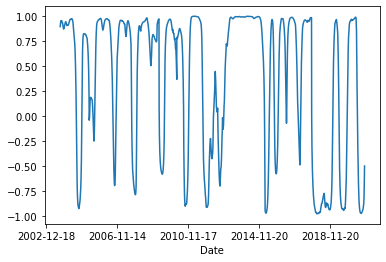

In [143]:
corr = SPMTRV.med.rolling(window=100).mean().rolling(window=100).corr(SPMTRV.TREAST)
corr.plot()


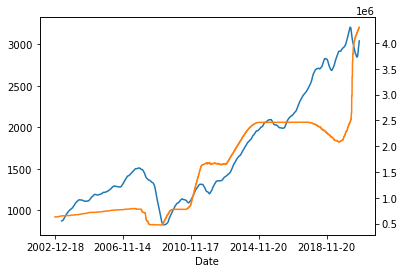

In [138]:
SPMTRV.med.rolling(window=100).mean().plot()
SPMTRV.TREAST.plot(secondary_y=True)
plt.show()

In [103]:
SPV[SPV.index > '2002-12-18']

,Volume
Date,
2002-12-19,15003.0
2002-12-20,361821.0
2002-12-23,247476.0
2002-12-24,95319.0
2002-12-26,193489.0
...,...
2020-08-03,1250449.0
2020-08-04,1145269.0
2020-08-05,1116787.0
